### 《多頭排列均線回踩策略》

標的：台股 (上市櫃)

進場：當日K棒擊穿10日均線，但仍滿足5/10/20/60均線多頭排列 (隔日開盤買入)

出場：5日均線下穿60日均線 (隔日開盤賣出)

期間：2016-04-08 ~ 2022-12-30

In [1]:
import BBQuant as bbq
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

df = pd.read_feather('/Users/kuanhsu/Desktop/code/Python/FILE/台股還原_d.ftr')
# df = pd.read_feather('/Users/kuanhsu/Desktop/code/Python/FILE/台股_5m.ftr')

In [4]:
close = bbq.get(df, 'Close')
open = bbq.get(df, 'Open')
low = bbq.get(df, 'Low')

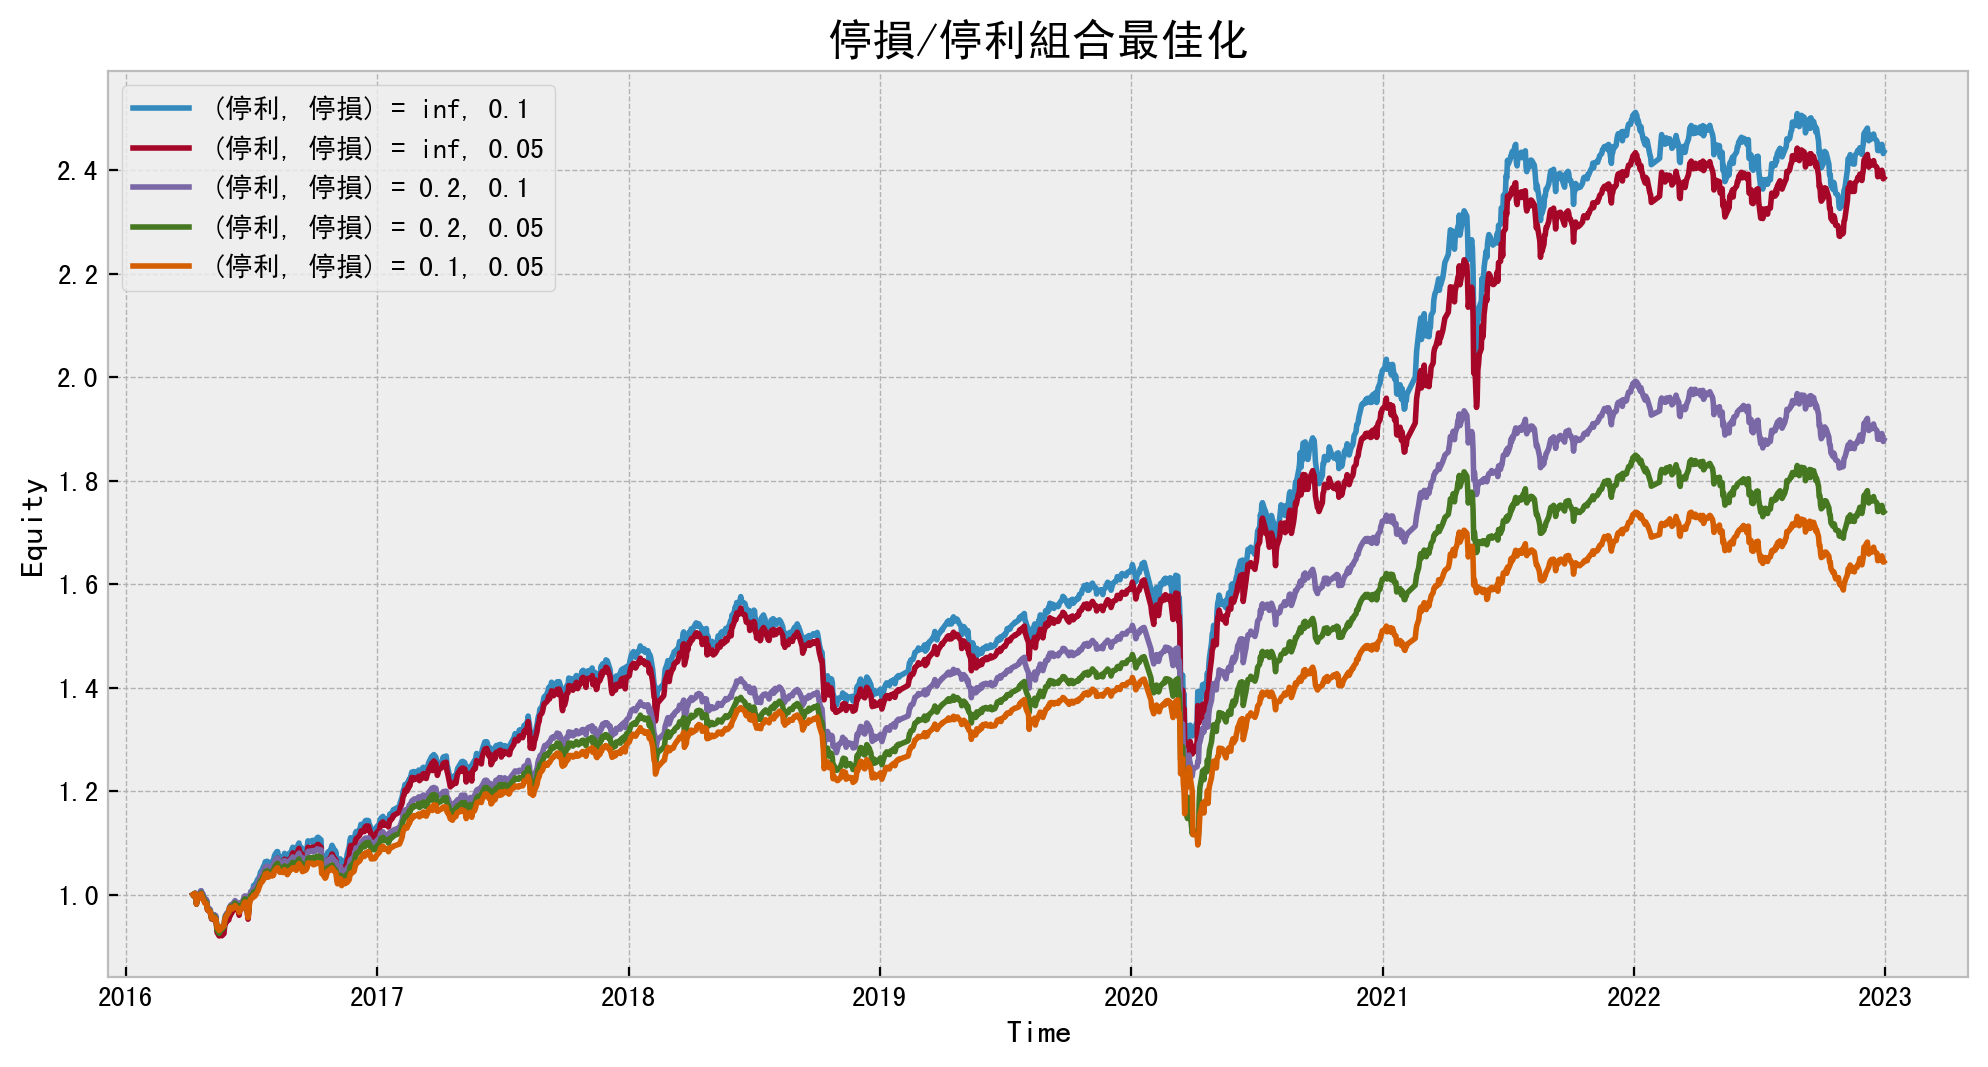

In [5]:
ma_5 = close.average(5)
ma_10 = close.average(10)
ma_20 = close.average(20)
ma_60 = close.average(60)

entries = (ma_5 > ma_10) & (ma_10 > ma_20) & (ma_20 > ma_60) & (low < ma_10).sustain() & (low > ma_20) & (low > ma_60)
exits = (ma_5 < ma_60)

bt = bbq.setting(open)
bt.optimize(entries, exits)

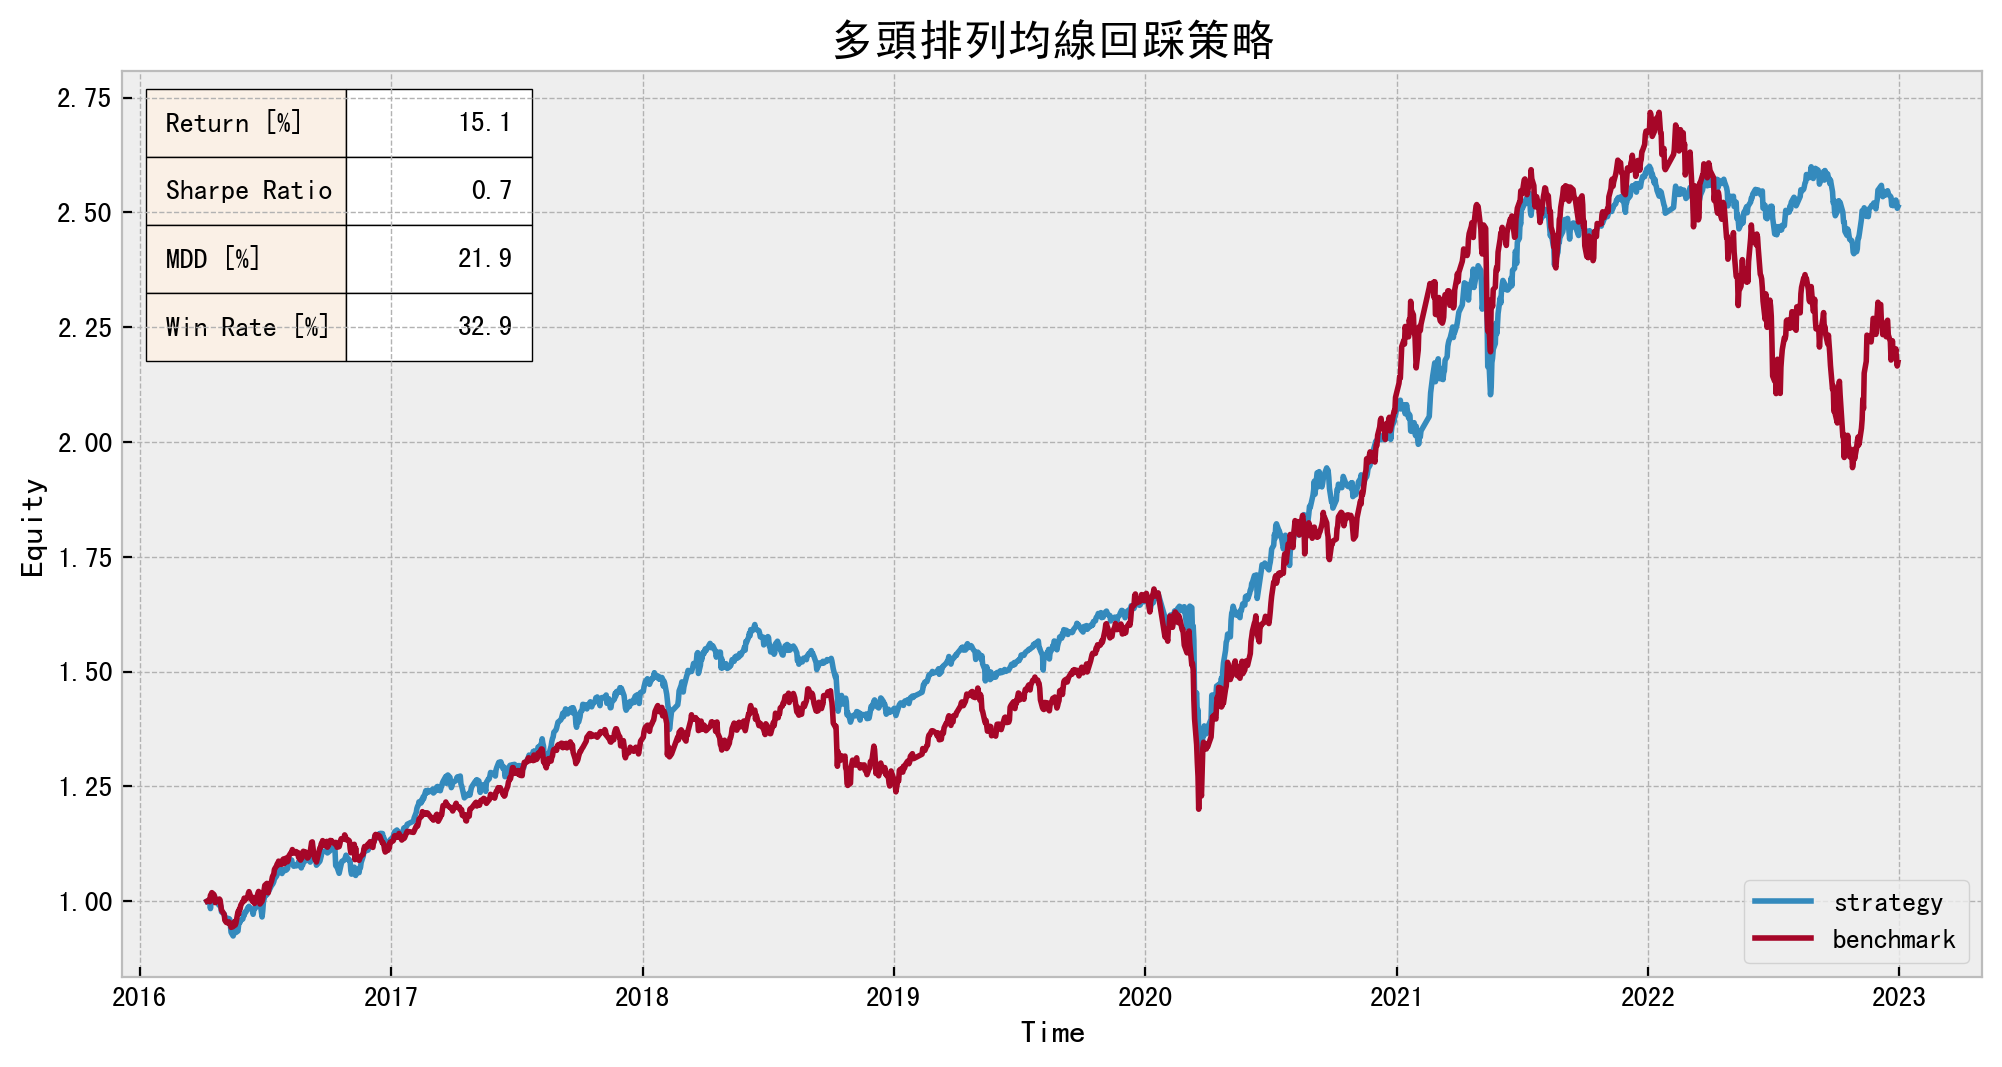

In [8]:
bt = bbq.setting(open)
position = bt.strategy(entries, exits)
report = bt.sim(position)
report.plot(name='多頭排列均線回踩策略')

In [9]:
report.stats()

Start Date                    2016-04-08
End Date                      2022-12-30
Period [days]                       1654
Win Period [days]                   1004
Total Return [%]                  151.23
Total Benchmark Return [%]        117.36
Return [%]                         15.07
Benchmark Return [%]               12.56
Volatility [%]                      20.4
MDD [%]                            21.88
MDD Duration [days]                   63
Total Trades                       24081
Win Rate [%]                       32.92
Best Trade [%]                      4.23
Worst Trade [%]                    -0.86
Average Trade [%]                    0.0
Profit Factor                       1.52
Win Loss Ratio                       3.1
Sharpe Ratio                        0.67
Sortino Ratio                       0.71
Calmar Ratio                        0.69
dtype: object

In [12]:
report.trades()

,asset,entry_date,exit_date,entry_price,exit_price,weight,ret
0,3332,2016-04-08,2016-04-15,27.74,27.27,0.005814,-0.000133
1,1465,2016-04-12,2016-04-20,10.65,10.54,0.004405,-0.000071
2,8087,2016-04-12,2016-04-21,8.97,7.50,0.003937,-0.000668
3,2344,2016-04-15,2016-04-22,7.58,7.04,0.003401,-0.000262
4,4933,2016-04-12,2016-04-25,16.46,14.93,0.003106,-0.000307
...,...,...,...,...,...,...,...
24076,9946,2022-12-13,2022-12-30,12.15,12.20,0.001038,-0.000002
24077,9951,2022-12-21,2022-12-30,65.90,65.40,0.001038,-0.000014
24078,9958,2022-11-11,2022-12-30,81.00,90.90,0.001038,0.000121
24079,9960,2022-12-12,2022-12-30,26.10,26.55,0.001038,0.000012
